# Lab 1 - BCC406

## REDES NEURAIS E APRENDIZAGEM EM PROFUNDIDADE

## Regressão Linear

### Prof. Eduardo e Prof. Pedro

Objetivos:

- Regressão e Descida do Gradiente

Data da entrega : 19/08 

- Complete o código (marcado com ToDo) e quando requisitado, escreva textos diretamente nos notebooks. Onde tiver *None*, substitua pelo seu código.
- Execute todo notebook e salve tudo em um PDF **nomeado** como "NomeSobrenome-LabX.pdf"
- Envie o PDF via google [FORM](https://forms.gle/vXrTeKVNB6HnpUGfA)


# Regressão e Descida do Gradiente (100pt)

Neste estudo dirigido, resolveremos um problema de regressão, usando algoritmos da descida do gradiente para otimização dos pesos. Vamos implementar a descida do gradiente tradicional e uma versão estocástica com mini-lotes.

Vamos aplicar em um problema de predição de preços de casas (**California Housing Dataset**)

## Regressão (10pt)

### Importando as bibliotecas

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

np.random.seed(150794)

A biblioteca [Scikit-learn](https://scikit-learn.org/stable/) é focada em aprendizagem de máquina e fornece diversos métodos de classificação, extração de características, etc. Ela também fornece algumas bases de dados clássicas, por meio de objetos do Pandas.

Se você não conhece o pacote Pandas, veja este [curso rápido](https://www.kaggle.com/learn/pandas).

### Carregando os dados

In [51]:
housing_data = fetch_california_housing()

Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])

df = Features.join(Target)

In [52]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

### Entendendo os dados

Vamos usar apenas uma característica, renda média (MedInc), como variável independente e o preço final como variável dependente.

In [53]:
df[['MedInc', 'Target']].describe()

MedInc        Target
count  20640.000000  20640.000000
mean       3.870671      2.068558
std        1.899822      1.153956
min        0.499900      0.149990
25%        2.563400      1.196000
50%        3.534800      1.797000
75%        4.743250      2.647250
max       15.000100      5.000010

**Resultado esperado (não precisa ser idêntico)**

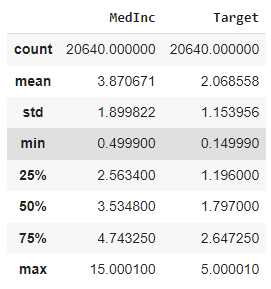

### Pré-processamento

#### Removendo outlier

Perceba que em 75% dos dados, a renda média (MedInc) é menor que 5 e que o valor da casa (Target) é menor que 3. Vamos remover rendas maiores que 5 e casas com preço maior que 3, para evitar valores espúrios e outliers.

In [54]:
df = df[df.MedInc < 5]
df = df[df.Target < 3]

#### Normalização

Também vamos deixar as duas variáveis na faixa entre 0 e 1 

In [55]:
def scale(x):
    min = x.min()
    max = x.max()
    return pd.Series([(i - min)/(max - min) for i in x])

X = scale(df.MedInc)
y = scale(df.Target)

In [56]:
#conferindo o valor máximo 
X.max(), y.max()

(1.0, 1.0)

Valor esperado: (1.0, 1.0)

#### Plotando os dados

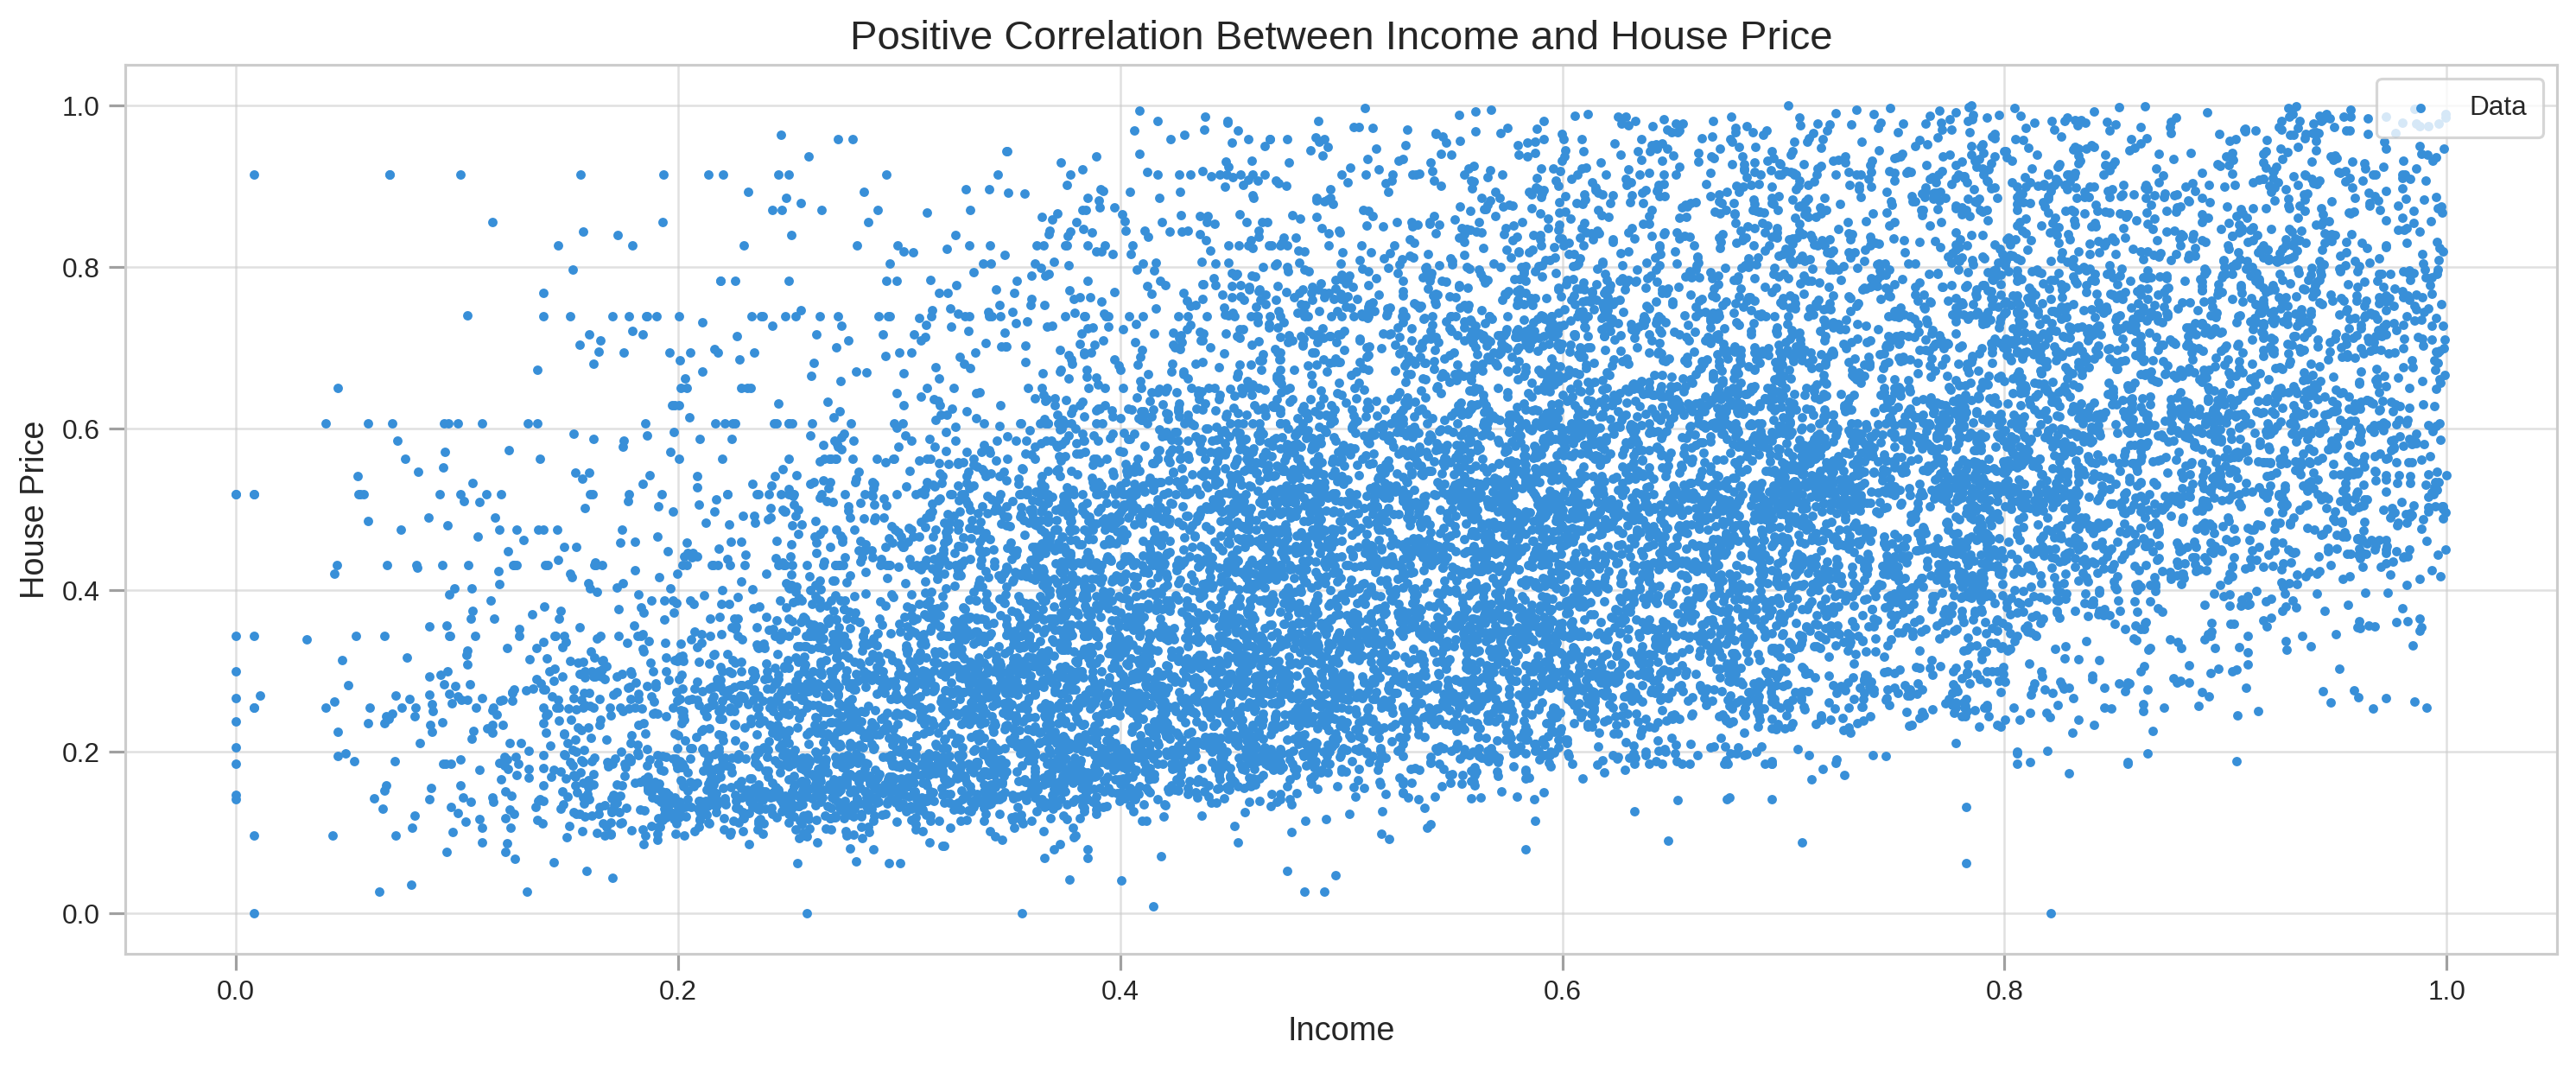

In [57]:
plt.figure(figsize=(16,6))
plt.rcParams['figure.dpi'] = 227
plt.style.use('seaborn-whitegrid')
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Positive Correlation Between Income and House Price', fontSize=15)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
plt.show()

**Resultado esperado (não precisa ser idêntico)**
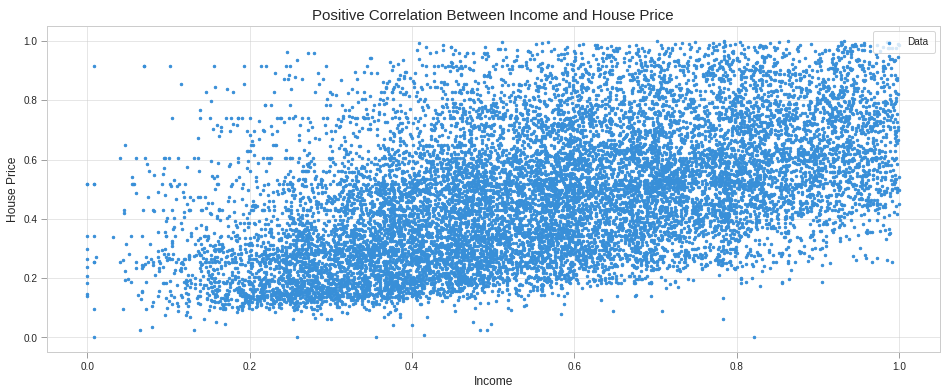

### **ToDo**: Discussão (10pt)

Por que os dados devem ser normalizados entre 0 e 1 ?

```
  - Durante etapas de análise lidar com atributos me escalas diferentes pode
    ser um problema. A normalização pode evitar esse tipo de problema.
  
  - Normalizar os dados, geralmente, favorece a identificação de correlação
    entre os dados, já que amplitude de ambos estão defindos em um mesmo intervalo.



```

## Descida do gradiente (90pt)

Vamos resolver uma regressão linear, de uma única característica - MedInc -  (vetor de pesos tem uma dimensão), do tipo $Y = mX + b$, e usar erro quadrático médio (mean squared error) como funçào objetivo para a descida do gradiente.

![MSE](https://drive.google.com/uc?export=view&id=1XrK7UrWYdKk2iMgnDPmTMtYbpX44mULB)

considerando y chapéu como saída do nosso modelo e y como o rótulo. Expandindo a função é : 

![exp](https://drive.google.com/uc?export=view&id=1g_xl-nAjSpzBa-ee6k0rLX5xNF6QlQH-)

Derivada em relação a m :

![derm](https://drive.google.com/uc?export=view&id=1UYon6FpnwGD3oLS9-Sx5tOunRBI1dagM)

Derivada em relação a b :

![derb](https://drive.google.com/uc?export=view&id=1ukBveq7BRl7sV2NE__sXnminbpiRrQqd)

### **ToDo**: Função da descida do gradiente e para plotar a regressão (30pts)

Vamos implementar uma função chamada *gradient_descent*, seguindo alguns passos:

  1.   Inicializar m e b aleatoriamente (entre 0 e 1)
  2.   Iterar por um número de épocas (*epoch*)
  3.   A cada iteração, calcular o valor predito, o erro quadrático entre o valor predito e $y$, atualizar os valores de m e b no sentido contrário do gradiente (o ajuste deve ser controlado por um taxa de aprendizado - *Learning Rate (lr)*).
  4.   Armazenar m, b e erro corrente para análise futura

In [58]:
def gradient_descent(X, y, lr=0.05, epoch=10):
    
    '''
    Descida do Gradiente
    '''

    m, b = np.random.uniform(), np.random.uniform() # ToDo : inicialize aleatoriamente entre 0 e 1

    log, mse_log = [], [] # listas para armazenar o processo de aprendizado
    N = len(X) # número de instâncias total do conjunto
    
    for e in range(epoch):
        
        predict = m*X + b # ToDo : propague (feed-forward) ara obter as predições : m*X + b
        MSE = ((y-predict)**2).mean() # ToDo : calcule o erro quadrático médio, conforme equação acima
        
        f = ((-2*(X*(y-predict))).mean() * lr, (-2*(y-predict)).mean()* lr ) # ToDo : compute a derivada 
        
        # atualize m e b
        m -= f[0] # ToDo : atualize m com base na equação acima. Lembre-se de ponderar pela taxa de aprendizado (lr)
        b -= f[1] # ToDo : atualize b com base na equação acima. Lembre-se de ponderar pela taxa de aprendizado (lr)
        
        # armazena para uso futuro
        log.append((m, b))
        mse_log.append(MSE)        
    
    return m, b, log, mse_log

In [59]:
def plot_regression(X, y, y_pred, log=None, title="Linear Regression"):
    
    plt.figure(figsize=(16,6))
    plt.rcParams['figure.dpi'] = 227
    plt.scatter(X, y, label='Data', c='#388fd8', s=6)
    if log != None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw=1, c='#caa727', alpha=0.15)
    plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regressao')
    plt.title(title, fontSize=14)
    plt.xlabel('Renda', fontSize=11)
    plt.ylabel('Preço', fontSize=11)
    plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
    plt.show()

MSE: 0.03510644489319854


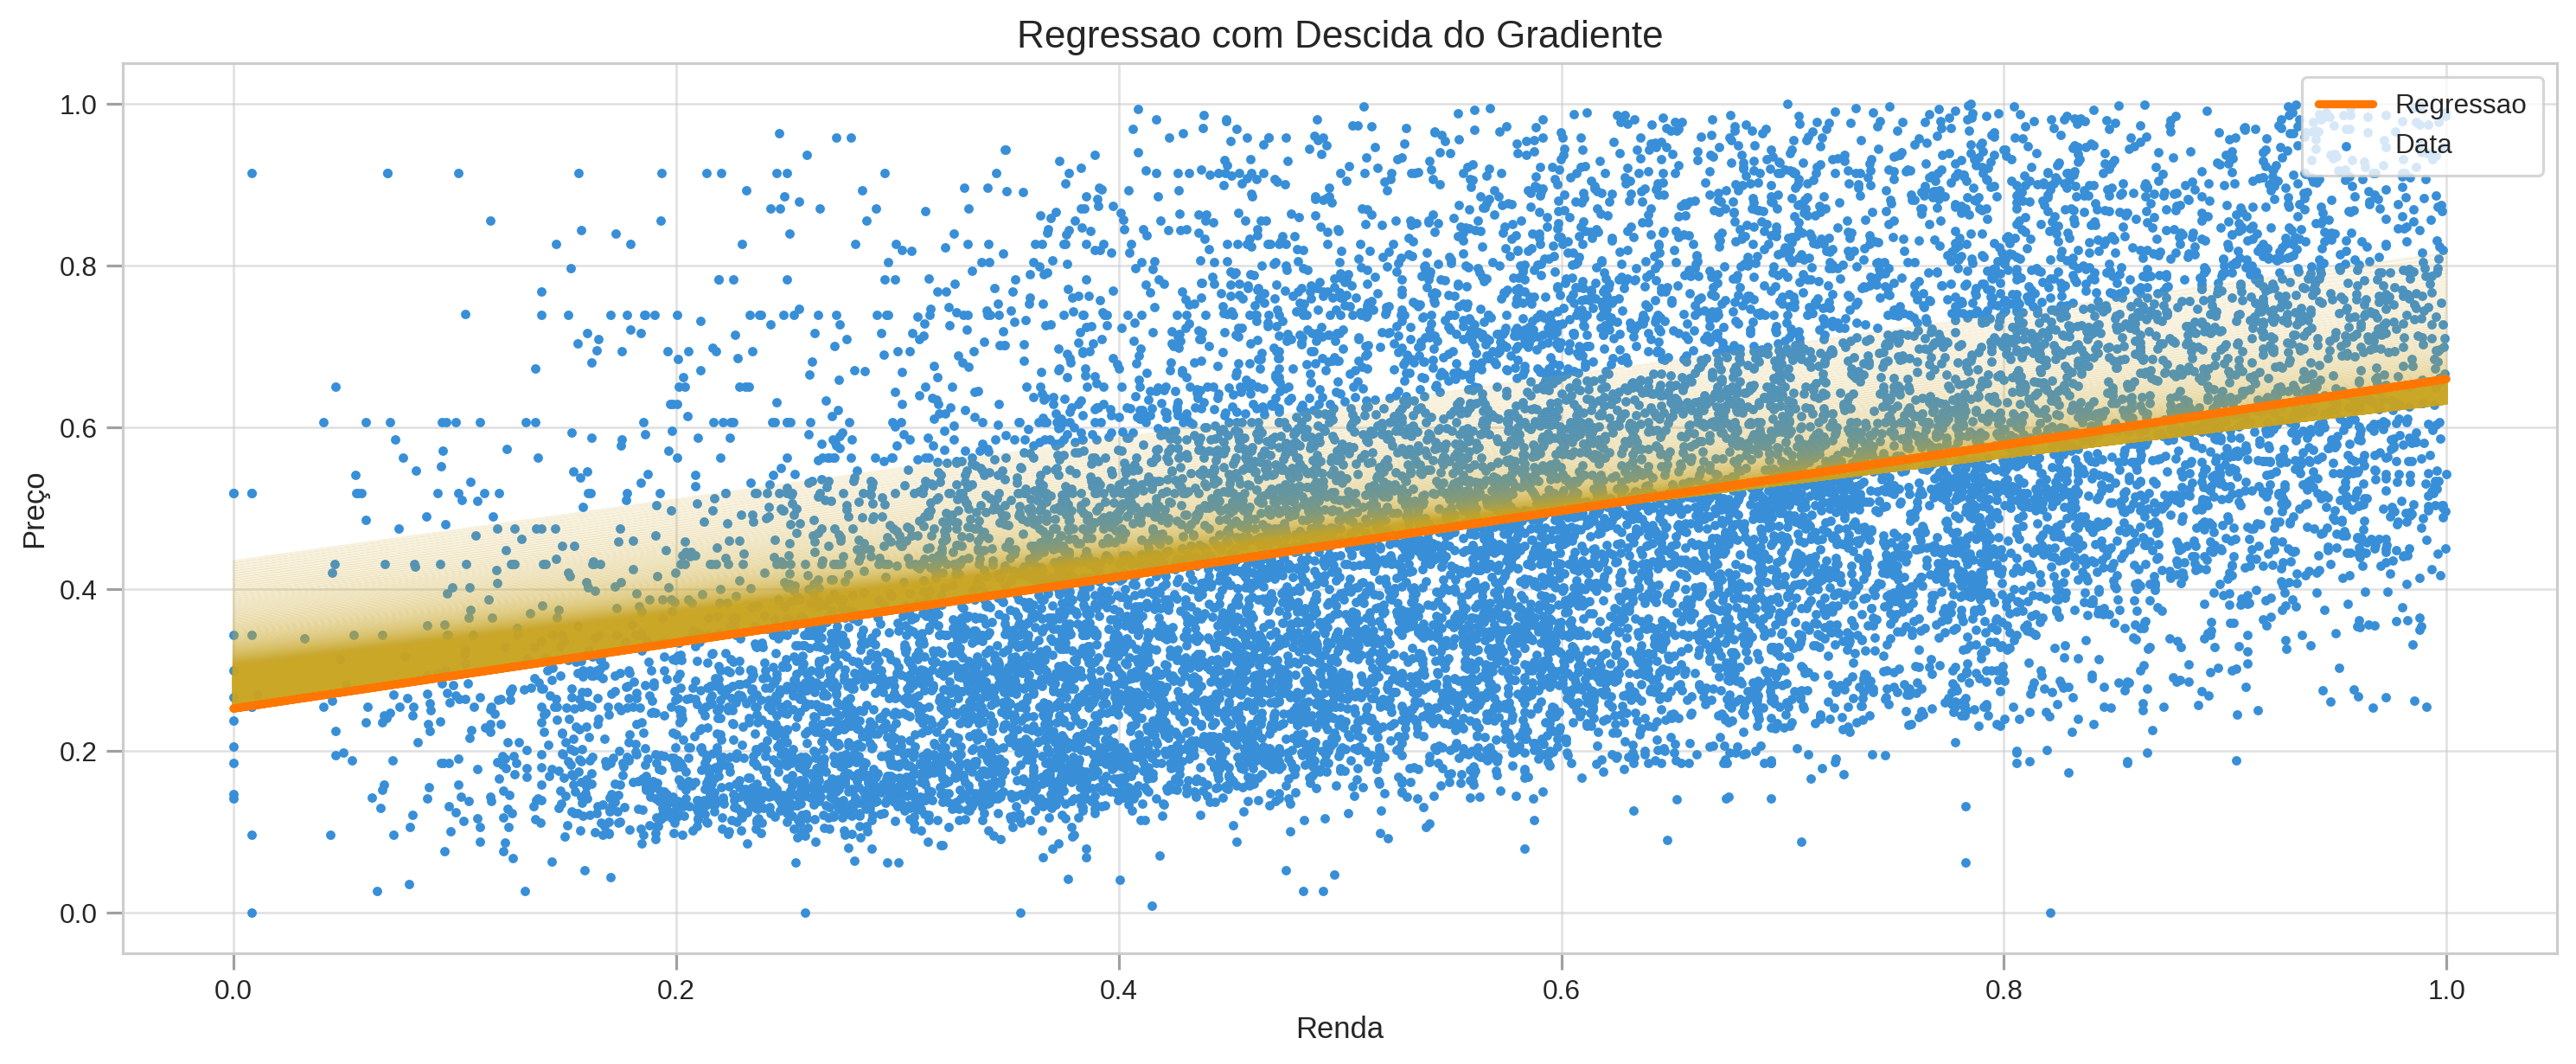

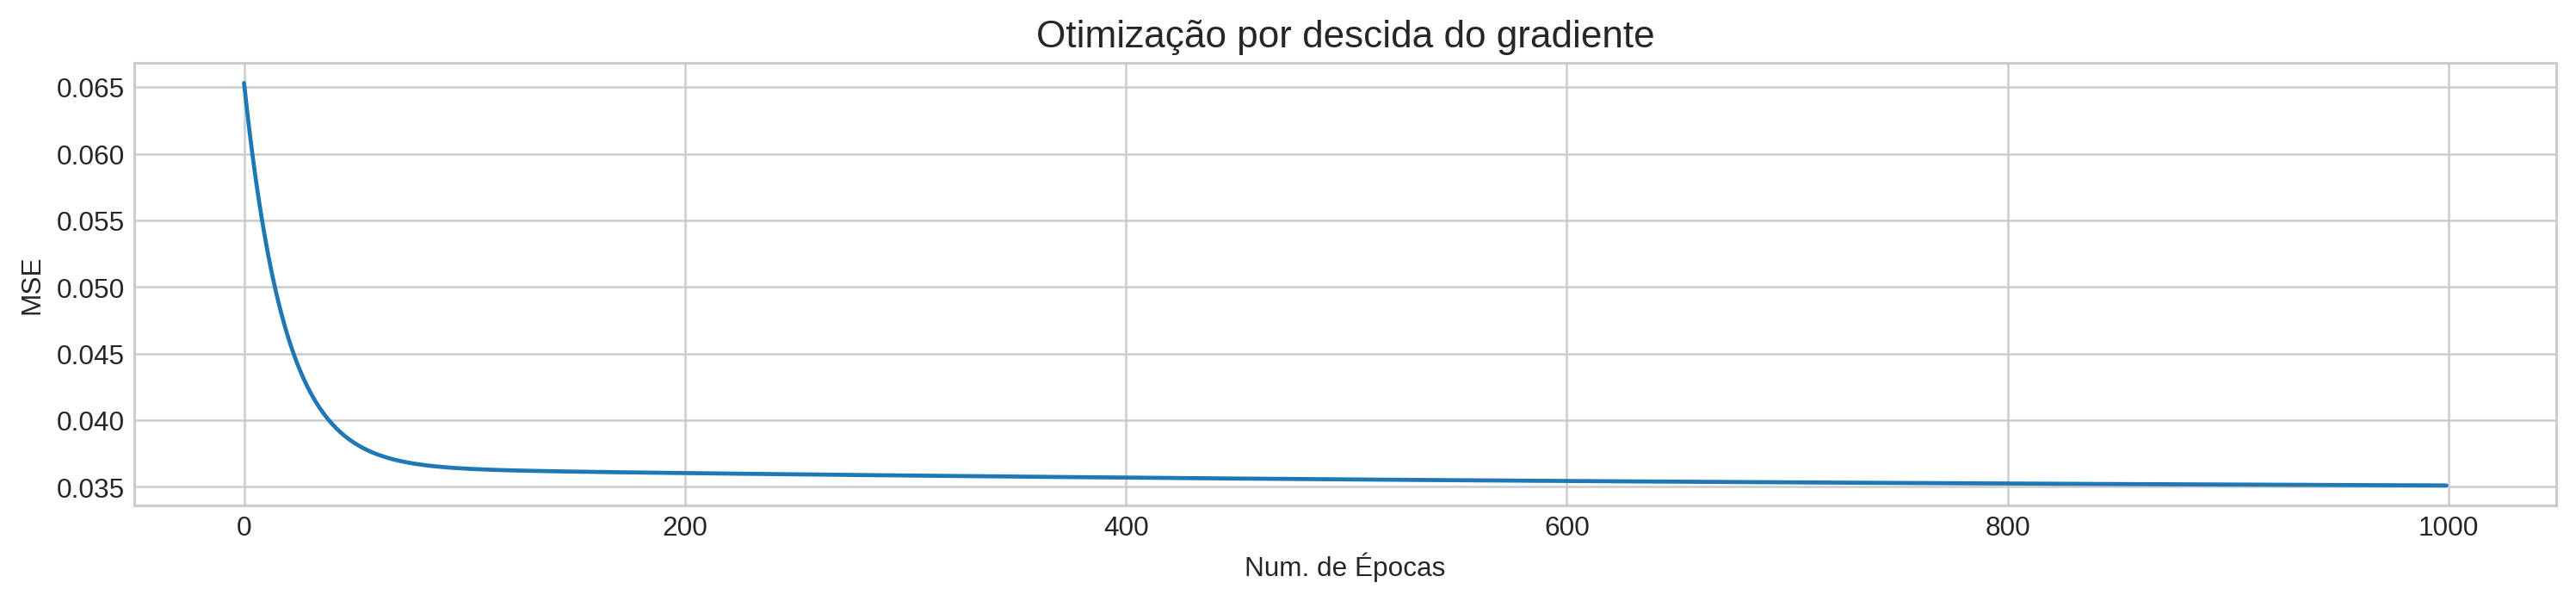

In [60]:
m, b, log1, mse1 = gradient_descent(X, y, lr=0.01, epoch=1000)

y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))
plot_regression(X, y, y_pred, log=log1, title="Regressao com Descida do Gradiente")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse1)), mse1)
plt.title('Otimização por descida do gradiente', fontSize=14)
plt.xlabel('Num. de Épocas')
plt.ylabel('MSE')
plt.show()

**Resultados eperados (não precisa ser idêntico)**

```MSE: 0.034740339862818236```

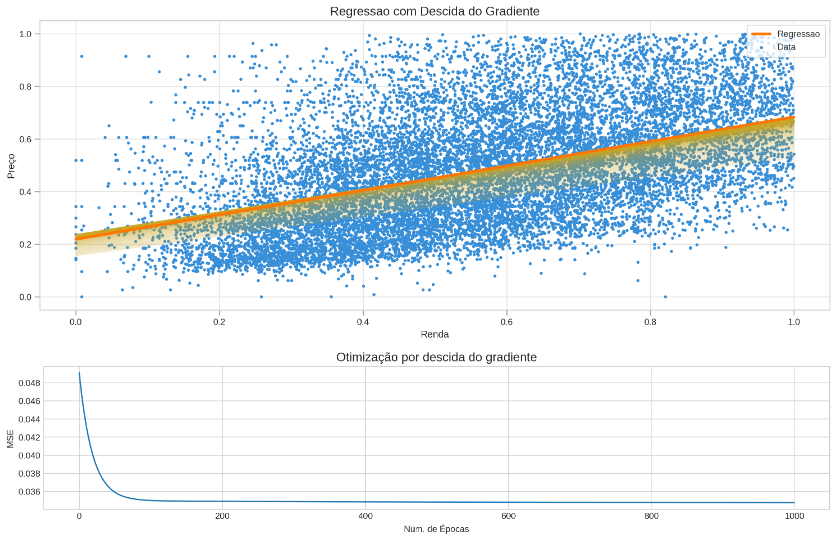

### **ToDo**: Discussão (10pt)

Use a função gradient_descent, para o conjunto de dados de casas ($X$ e $y$) carregados acima, com uma taxa de aprendizado de 0.01 por 1000 épocas. Analise as curvas plotadas. O que você pode dizer sobre as curvas?

```
  Ao decorrer das iterações o modelo foi de ajustando ao dados ao longo das
  iterações. Após algumas iterações, os ajustes no modelo e a variação do MSE
  ficam cada vez mais sutis.  
```

### **ToDo**: Descida do Gradiente Estocástica (40pt)

A descida do gradiente estocástica (do inglês Stochastic Gradient Descent - SGD) tem este nome por que ela não é realizada no conjunto de dados inteiro, mas em uma sub-amostragem do conjunto de dados. Esta sub-amostragem é aleatória. Na SGD, o gradiente é aplicado a um sub-conjunto dos dados (um lote ou mini-lote). 

A função deve seguir:

  1.   Inicializar m e b aleatoriamente (entre 0 e 1)
  2.   Iterar por um número de épocas
  3.   A cada iteração, amostrar um mini-lote (sub-conjunto) de $X$ (*batch_size*),  calcular o valor predito para o mini-lote, calcular o erro quadrático para o mini-lote (entre valor predito e $y$), atualizar os valores de m e b, no sentido contrário do gradiente (o ajuste deve ser controlado por um taxa de aprendizado - *lr*).
  4.   Armazenar m, b e erro corrente para análise futura

In [61]:
def SGD(X, y, lr=0.05, epoch=10, batch_size=1):
        
    '''
    Descida do Gradiente Estocástica
    '''
    
    m, b = 0.002, 0.5 # inicializa os parâmatros 
    log, mse_log = [], [] # listas para armazenar o processo de aprendizado
    
    for _ in range(epoch):
        
        # ToDo : amostre aleatoriamnte algumas instâncias (até batch_size)
        cut_point = np.random.randint(0, len(X)-batch_size)
        mini_batch_X = X[cut_point:cut_point+batch_size]# ToDo : complete
        mini_batch_y = y[cut_point:cut_point+batch_size] # ToDo : complete


        predict = m*mini_batch_X + b # ToDo : propague (feed-forward) ara obter as predições : m* mini_batch_X + b

        MSE = ((mini_batch_y-predict)**2).mean()  # ToDo : complete
        #print(MSE)
        
        f = ((-2*(mini_batch_X*(mini_batch_y-predict))).mean() * lr, (-2*(mini_batch_y-predict)).mean()* lr )# ToDo : compute a derivada do mini-lote
        
        # Updating parameters m and b
        m -= f[0] # ToDo : atualize m com base na equação acima. Lembre-se de ponderar pela taxa de aprendizado (lr)
        b -= f[1] # ToDo : atualize b com base na equação acima. Lembre-se de ponderar pela taxa de aprendizado (lr)


        log.append((m, b))
        mse_log.append(MSE)      
    
    return m, b, log, mse_log

Use a função SGD, para o conjunto de dados de casas ($X$ e $y$) carregados acima, com uma taxa de aprendizado de 0.01 por 1000 épocas.

MSE: 0.037530150188932195


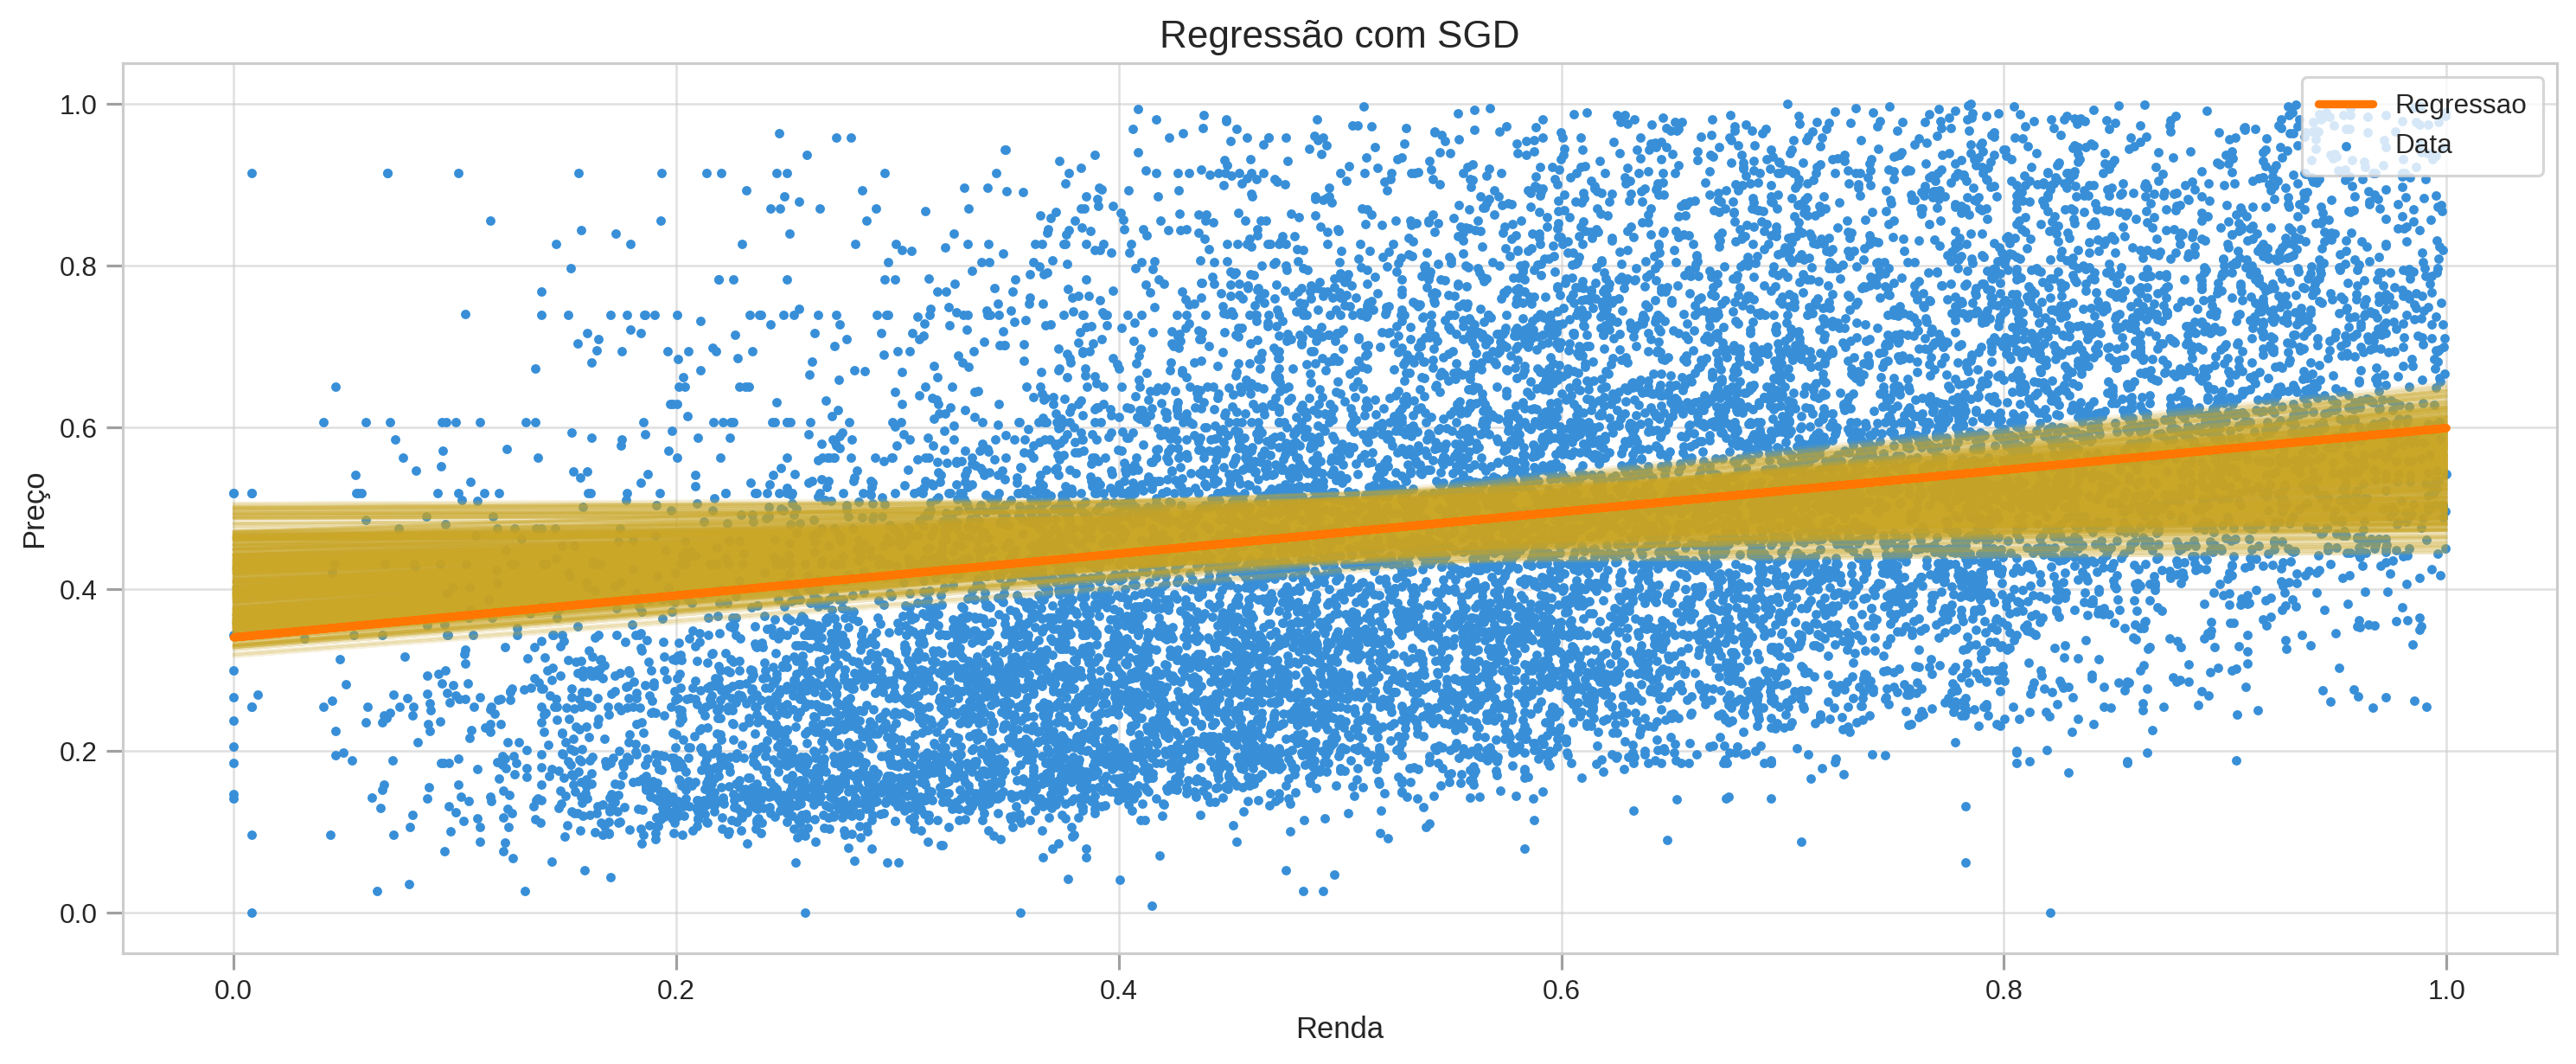

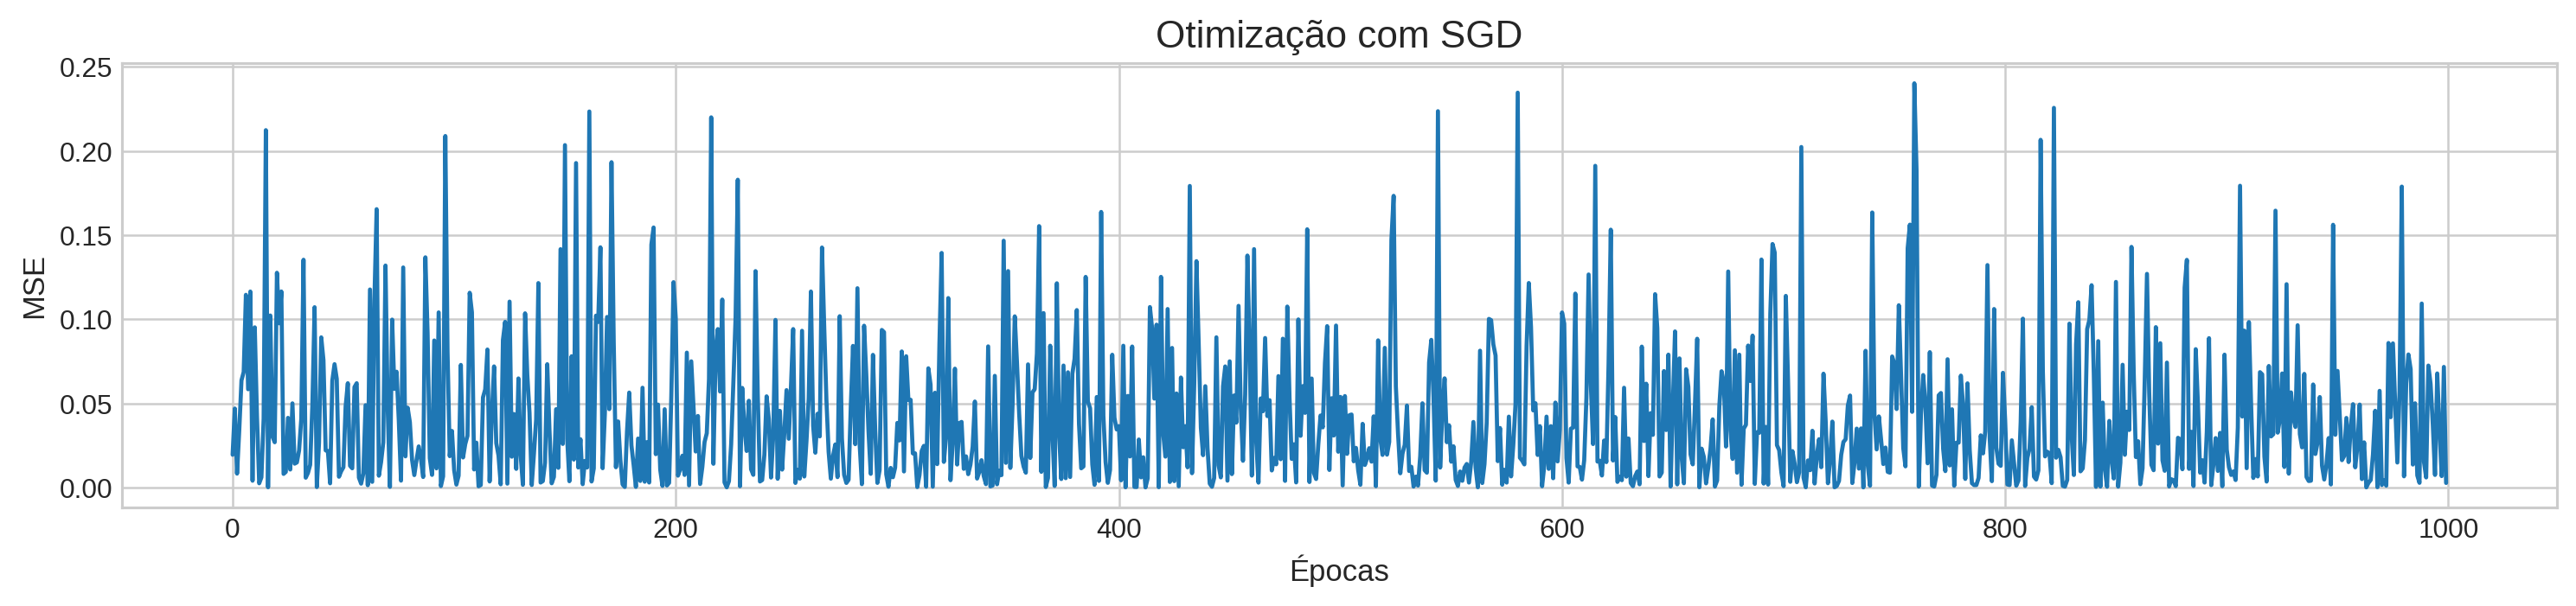

In [62]:
m, b, log2, mse2 = SGD(X, y, lr=0.01, epoch=1000, batch_size=2)

y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))
plot_regression(X, y, y_pred, log=log2, title="Regressão com SGD")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse2)), mse2)
plt.title('Otimização com SGD', fontSize=14)
plt.xlabel('Épocas', fontSize=11)
plt.ylabel('MSE', fontSize=11)
plt.show()

**Resultado esperado (não precisa ser idêntico)**

```
 MSE: 0.03760346179860297
```

### **ToDo**: Discussão (10pt)

O que você conclui, olhando para as duas curvas de custo (MSE x Épocas) ?

```
  O MSE na Decida do Gradiente comum vai convergido de forma constante ao 
  decorrer das épocas. Enquando no método estocástico o MSE varia bastante,
  já para cada passo os dados usados para o cálculo do gradiente se alteram. 
```